The purpose of this notebook is to do some high level analyses on unpaid labor done by women across the world. This is based on data collected by 'The World Bank', and available [here](https://datahub.io/world-bank/sg.tim.uwrk.fe#readme)

According to the website: <i>"The average time women spend on household provision of services for own consumption. Data are expressed as a proportion of time in a day. Domestic and care work includes food preparation, dishwashing, cleaning and upkeep of a dwelling, laundry, ironing, gardening, caring for pets, shopping, installation, servicing and repair of personal and household goods, childcare, and care of the sick, elderly or disabled household members, among others."</i>

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
"""
Directly downloading the data from the site into a csv file because there was an issue with the api
"""

data = pd.read_csv('./data/data_csv.csv')
data.head()

,Country Name,Country Code,Year,Value
0,Albania,ALB,2011,21.74
1,Algeria,DZA,2012,22.08
2,Argentina,ARG,2005,16.74
3,Argentina,ARG,2010,23.75
4,Argentina,ARG,2013,23.68


Upon looking at the data in the csv file, I've noticed that it doesn't contain an exhaustive list of countries across the world. It doesn't have consistent data for all of them over the years. We have the most data from USA, and Switzerland. There are large gaps in data, for example, in the case of Canada, we only have data for 2005 and 2010. 

In [11]:
df_us = data[data['Country Code']=='USA']
df_us.head()

,Country Name,Country Code,Year,Value
131,United States,USA,2003,16.53
132,United States,USA,2004,16.67
133,United States,USA,2005,16.53
134,United States,USA,2006,16.25
135,United States,USA,2007,16.04


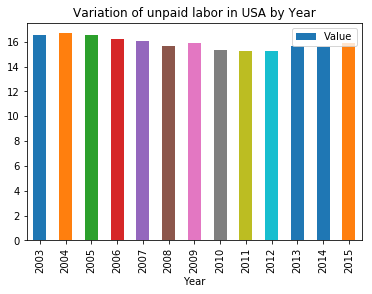

In [13]:
df_us.plot(x='Year',y='Value',title='Variation of unpaid labor in USA by Year',kind='bar')

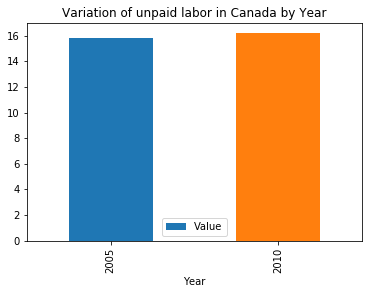

In [16]:
data[data['Country Code']=='CAN'].plot(x='Year',y='Value',title='Variation of unpaid labor in Canada by Year',kind='bar')

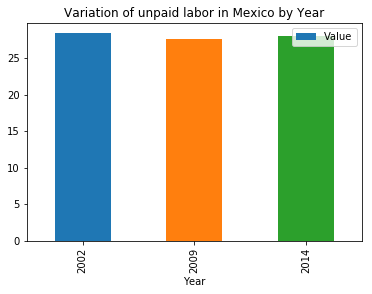

In [18]:
data[data['Country Code']=='MEX'].plot(x='Year',y='Value',title='Variation of unpaid labor in Mexico by Year',kind='bar')

As mentioned earlier, there is an inconsistency in the amount of data that exists across various countries. It probably makes sense to leave out countries that don't have at least 3 data points. We can probably add those countries back once we look at trends in GDP and see if there's a correlation between GDP and unpaid labor. 

It also makes sense to join this data against GDP data (also made available by the World Bank)

In [19]:
gdp_data = pd.read_csv('./data/core/gdp/data/gdp_csv.csv')
gdp_data.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


Joining the two datasets by country code and year to get the dataframe below

In [20]:
#joining unpaid labor data with gdp data for the year 2014
pd_join_1 = pd.merge(data,gdp_data,on=['Country Code','Year','Country Name'])
pd_join_1

,Country Name,Country Code,Year,Value_x,Value_y
0,Albania,ALB,2011,21.74,1.289087e+10
1,Algeria,DZA,2012,22.08,2.090590e+11
2,Argentina,ARG,2005,16.74,1.987371e+11
3,Argentina,ARG,2010,23.75,4.236274e+11
4,Argentina,ARG,2013,23.68,5.520251e+11
5,Armenia,ARM,2004,24.03,3.576615e+09
6,Armenia,ARM,2008,21.67,1.166204e+10
7,Australia,AUS,2006,20.83,7.475726e+11
8,Austria,AUT,2009,16.94,4.001723e+11
9,Azerbaijan,AZE,2008,25.42,4.885248e+10


Some sample plots to see if the join works

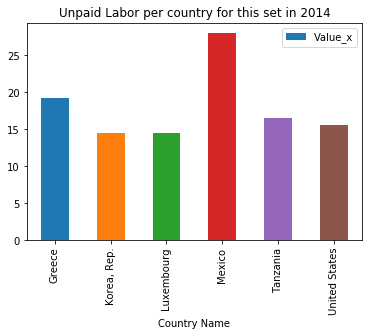

In [28]:
pd_join_1[pd_join_1['Year']==2014].plot(x='Country Name',y='Value_x',kind='bar',title='Unpaid Labor per country for this set in 2014')

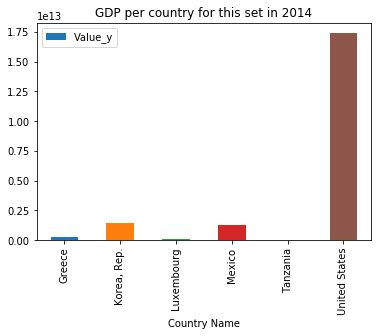

In [21]:
pd_join_1[pd_join_1['Year']==2014].plot(x='Country Name',y='Value_y',kind='bar',title='GDP per country for this set in 2014')

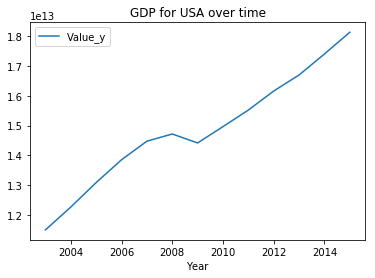

In [32]:
pd_join_1[pd_join_1['Country Code']=='USA'].plot(x='Year',y='Value_y',kind='line',title='GDP for USA over time')

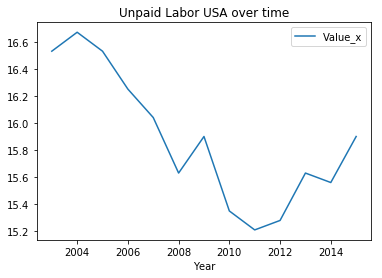

In [33]:
pd_join_1[pd_join_1['Country Code']=='USA'].plot(x='Year',y='Value_x',kind='line',title='Unpaid Labor USA over time')